In [35]:
import github_command as gt

In [36]:
gt.push(file_to_transfer="BONUS_Deploy_A_ML_Model.ipynb",
       message="How to deploy simply a model", 
       repos="TDs_ESILV.git")

In [37]:
gt.push(file_to_transfer="bonus_deploy_a_model_ressources/",
       message="Dockerfile - Model - Flask WebApp", 
       repos="TDs_ESILV.git")

<h1>Deploy a ML model</h1>

> More about freeze for requirements.txt : https://medium.com/@boscacci/why-and-how-to-make-a-requirements-txt-f329c685181e

> Basics of using Docker for Amazon : https://docs.aws.amazon.com/fr_fr/AmazonECS/latest/developerguide/docker-basics.html

> Simple way to deploy machine learning model to cloud : https://towardsdatascience.com/simple-way-to-deploy-machine-learning-models-to-cloud-fd58b771fdcf

In [34]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor

In [10]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [179]:
model = RandomForestRegressor(n_estimators=200, criterion='mse', max_depth=5)

In [180]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [181]:
model.score(X_test, y_test)

0.8769740015958664

In [299]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [292]:
test = load_boston()

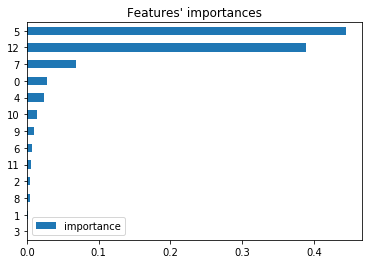

In [320]:
names_and_feature_imp = pd.DataFrame({'names':load_boston().feature_names,
                                     'importance': model.feature_importances_})
names_and_feature_imp.sort_values(["importance"], ascending=True, inplace=True)
names_and_feature_imp.plot(kind='barh', title="Features' importances")

In [12]:
X_train, X_test = X_train[:, [5, 12, 7, 0, 4]], X_test[:, [5, 12, 7, 0, 4]]

In [329]:
model = RandomForestRegressor(n_estimators=200, criterion='mse', max_depth=5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8811065840821892

<h2>Save the model (using joblib) </h2>

In [330]:
import os
foldername = 'bonus_deploy_a_model_ressources/'
if not os.path.exists(foldername):
    os.mkdir(foldername)

In [16]:
joblib.dump(model, filename = foldername+'model.sav')

['bonus_deploy_a_model_ressources/model.sav']

<h2>Load the model</h2>

In [17]:
model = joblib.load(foldername+"model.sav")

In [18]:
model.score(X_test, y_test)

0.9252894650127806

<h2>Flask</h2>

In [195]:
from flask import Flask, request

In [188]:
model = None
foldername = 'bonus_deploy_a_model_ressources/'

def load_model():
    global model
    with open(foldername+"model.sav", 'rb') as file:
        model = joblib.load(file)

In [189]:
app = Flask(__name__)

In [190]:
app.name

'__main__'

In [191]:
@app.route('/')
def home_page():
    return "Hello World !\n Send us some data and we will predict the outcome for you"

In [193]:
import requests

In [248]:
test = np.array([1,2,3,4,5,6])

In [249]:
test.shape

(6,)

In [259]:
np.array([1,2,3])

array([1, 2, 3])

In [275]:
test[:, np.newaxis] #shape (6,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [273]:
test.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [276]:
test[:,np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [246]:
test[np.newaxis]

array([[[1, 2, 3],
        [4, 5, 6]]])

In [277]:
@app.route('/predict', methods=['POST'])
def get_prediction():
    if request.method == "POST":
        data = request.get_json() # get data posted as json
        data = np.array(data)[np.newaxis, :] # shape (4,) to (1,4)
        prediction = model.predict(data)
    return str(prediction[0])

In [336]:
if __name__ == '__main__':
    load_model()  # load model at the beginning once only
    app.run(host='0.0.0.0', port=80)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:80/ (Press CTRL+C to quit)
[2019-11-24 12:44:34,436] ERROR in app: Exception on /predict [POST]
Traceback (most recent call last):
  File "/Users/lucbertin/anaconda3/lib/python3.6/site-packages/flask/app.py", line 2292, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/lucbertin/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1815, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/lucbertin/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1718, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/lucbertin/anaconda3/lib/python3.6/site-packages/flask/_compat.py", line 35, in reraise
    raise value
  File "/Users/lucbertin/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1813, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/lucbertin/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1799, in dispatch_request
    return self.v

In [ ]:
!conda env list

In [19]:
!pip freeze > requirements.txt

In [32]:
!docker build -t model_deployment ./bonus_deploy_a_model_ressources

Sending build context to Docker daemon  709.1kB
Step 1/8 : FROM python:slim
 ---> b5a7c089ece3
Step 2/8 : COPY requirements.txt /deploy/
 ---> Using cache
 ---> 6312fdba70df
Step 3/8 : RUN pip3 install -r /deploy/requirements.txt
 ---> Using cache
 ---> 7dc6b005b7e1
Step 4/8 : WORKDIR /deploy/
 ---> Using cache
 ---> e5c0a27c3a77
Step 5/8 : COPY web_app.py .
 ---> 7a38c11cc4c8
Step 6/8 : COPY model.sav .
 ---> 91193ffaa257
Step 7/8 : EXPOSE 80
 ---> Running in 4f6f2347874b
Removing intermediate container 4f6f2347874b
 ---> 2de2c1b13147
Step 8/8 : CMD ["python", "web_app.py"]
 ---> Running in c7398c0af7bf
Removing intermediate container c7398c0af7bf
 ---> c532a6ce9bed
Successfully built c532a6ce9bed
Successfully tagged model_deployment:latest


In [33]:
!docker run -p 80:80 model_deployment

 * Serving Flask app "web_app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.1 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.19.1 when using